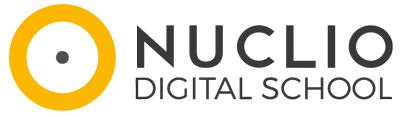

# Proyecto Análisis Avanzado de Datos para el sistema judicial de EEUU

## 1.	Análisis de Datos (EDA):

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

c:\Users\rotci.000\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Funciones

In [2]:
def check_df(df, tipo):
  # tipo == 'simple' - Solo muestra volumenes y cabecera
  if tipo == 'simple':
    print("¿Cuántas filas y columnas hay en el conjunto de datos?")
    num_filas, num_columnas = df.shape
    print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
    print('\n########################################################################################')

    print("¿Cuáles son las primeras dos filas del conjunto de datos?")
    display(df.head(2))
    print('\n########################################################################################')

  else:
    print("¿Cuántas filas y columnas hay en el conjunto de datos?")
    num_filas, num_columnas = df.shape
    print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
    print('\n########################################################################################')

    print("¿Cuáles son las primeras dos filas del conjunto de datos?")
    display(df.head(2))
    print('\n########################################################################################')

    print("¿Cuáles son las últimas dos filas del conjunto de datos?")
    display(df.tail(2))
    print('\n########################################################################################')

    print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
    display(df.sample(2))
    print('\n########################################################################################')

    print("¿Cuáles son las columnas del conjunto de datos?")
    for i in list(df.columns):
      print('\t - ' + i)
    print('\n########################################################################################')

    print("¿Cuál es el tipo de datos de cada columna?")
    print(df.dtypes)
    print('\n########################################################################################')

    print("¿Cuántas columnas hay de cada tipo de datos?")
    print(df.dtypes.value_counts())
    print('\n########################################################################################')

    print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
    print(df.info())
    print('\n########################################################################################')

    print("¿Cuántos valores únicos tiene cada columna?")
    print(df.nunique())
    print('\n########################################################################################')

    print("¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?")
    display(df.describe(include = 'all').fillna(''))
    print('\n########################################################################################')

    print("¿Hay valores nulos en el conjunto de datos?")
    print(df.isnull().sum().sort_values(ascending = False))
    print('\n########################################################################################')

    print("¿Cuál es el porcentaje de valores nulos en cada columna?")
    print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
    print('\n########################################################################################')

In [3]:
def deteccion_outliers (df, variable):
    # Suponiendo que tienes un DataFrame df y quieres analizar la columna 'columna_de_interes'
    columna = df[variable]

    sns.boxplot(
      data=df,
      y=variable,
    )
    plt.show()

    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1

    print('Valor del segundo cuartil (25%): {:.2f}'.format(Q1))
    print('Valor del tercer cuartil (75%): {:.2f}'.format(Q3))
    print('Valor del rango intercuartil (IQR): {:.2f}'.format(IQR))

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:")
    print(f"\t - Límite inferior (considerado extremadamente bajo): {limite_inferior:.2f}")
    print(f"\t - Límite superior (considerado extremadamente alto): {limite_superior:.2f}")


    outilers = list(columna[((columna < limite_inferior) | (columna > limite_superior))].index)
    num_outliers = len(outilers)
    print(f"Hay {num_outliers} outliers en la variable '{variable}'")
    return outilers

### Cargar datos

In [4]:
df1 = pd.read_csv(r'C:\Users\rotci.000\Documents\python\master\TFM.\compas-scores-raw.csv')
df2 = pd.read_csv(r'C:\Users\rotci.000\Documents\python\master\TFM.\compas-scores-two-years.csv')

In [5]:
print(df1.columns)
print(df2.columns)

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')
Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_

### Exploración inicial

In [6]:
check_df(df1, '')

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 60,843 filas y 28 columnas.

########################################################################################
¿Cuáles son las primeras dos filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0



########################################################################################
¿Cuáles son las últimas dos filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0
60842,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,18,Risk of Failure to Appear,16.00,2,Low,New,1,0



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
31747,28536,68848,62419,PRETRIAL,Reed,Dana,NaN,Female,African-American,05/02/89,...,2,Medium,8,Risk of Recidivism,-0.38,6,Medium,New,1,0
21564,56998,65132,59092,PRETRIAL,Trump,Jasmine,NaN,Female,African-American,01/04/93,...,1,Low,7,Risk of Violence,-1.82,5,Medium,New,1,0



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Person_ID
	 - AssessmentID
	 - Case_ID
	 - Agency_Text
	 - LastName
	 - FirstName
	 - MiddleName
	 - Sex_Code_Text
	 - Ethnic_Code_Text
	 - DateOfBirth
	 - ScaleSet_ID
	 - ScaleSet
	 - AssessmentReason
	 - Language
	 - LegalStatus
	 - CustodyStatus
	 - MaritalStatus
	 - Screening_Date
	 - RecSupervisionLevel
	 - RecSupervisionLevelText
	 - Scale_ID
	 - DisplayText
	 - RawScore
	 - DecileScore
	 - ScoreText
	 - AssessmentType
	 - IsCompleted
	 - IsDeleted

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text        

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
count,60843.0,60843.0,60843.0,60843,60843,60843,15624,60843,60843,60843,...,60843.0,60843,60843.0,60843,60843.0,60843.0,60798,60843,60843.0,60843.0
unique,,,,4,10896,7225,1870,2,9,10382,...,,4,,3,,,3,2,,
top,,,,PRETRIAL,Williams,Michael,A,Male,African-American,04/28/92,...,,Low,,Risk of Violence,,,Low,New,,
freq,,,,41100,417,777,606,47514,27018,30,...,,38472,,20281,,,41487,56139,,
mean,53683.206154,68061.02919,60209.128149,,,,,,,,...,1.630048,,11.0,,5.081457,3.571701,,,1.0,0.0
std,14363.648515,7320.208226,9638.501654,,,,,,,,...,0.94422,,4.966596,,10.080518,2.617854,,,0.0,0.0
min,656.0,649.0,350.0,,,,,,,,...,1.0,,7.0,,-4.79,-1.0,,,1.0,0.0
25%,52039.0,62582.0,56021.0,,,,,,,,...,1.0,,7.0,,-2.09,1.0,,,1.0,0.0
50%,57321.0,68229.0,61261.0,,,,,,,,...,1.0,,8.0,,-0.71,3.0,,,1.0,0.0
75%,62748.0,73870.0,66554.0,,,,,,,,...,2.0,,18.0,,14.0,5.0,,,1.0,0.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
MiddleName                 45219
ScoreText                     45
Person_ID                      0
CustodyStatus                  0
IsCompleted                    0
AssessmentType                 0
DecileScore                    0
RawScore                       0
DisplayText                    0
Scale_ID                       0
RecSupervisionLevelText        0
RecSupervisionLevel            0
Screening_Date                 0
MaritalStatus                  0
LegalStatus                    0
AssessmentID                   0
Language                       0
AssessmentReason               0
ScaleSet                       0
ScaleSet_ID                    0
DateOfBirth                    0
Ethnic_Code_Text               0
Sex_Code_Text                  0
FirstName                      0
LastName                       0
Agency_Text                    0
Case_ID 

In [7]:
check_df(df2, '')

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 7,214 filas y 53 columnas.

########################################################################################
¿Cuáles son las primeras dos filas del conjunto de datos?


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1



########################################################################################
¿Cuáles son las últimas dos filas del conjunto de datos?


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0
7213,11001,florencia sanmartin,florencia,sanmartin,2014-06-30,Female,1992-12-18,23,Less than 25,Hispanic,...,4,Low,2014-06-30,2015-03-15,2015-03-15,2,0,258,0,1



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
6360,9709,trimaine ward,trimaine,ward,2013-04-27,Female,1994-11-30,21,Less than 25,African-American,...,9,High,2013-04-27,2015-10-21,2015-11-22,1,3,907,0,0
321,474,ann-marie cassagnol,ann-marie,cassagnol,2014-03-22,Female,1964-08-13,51,Greater than 45,Caucasian,...,1,Low,2014-03-22,2014-03-22,2014-03-23,0,1,741,0,0



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - id
	 - name
	 - first
	 - last
	 - compas_screening_date
	 - sex
	 - dob
	 - age
	 - age_cat
	 - race
	 - juv_fel_count
	 - decile_score
	 - juv_misd_count
	 - juv_other_count
	 - priors_count
	 - days_b_screening_arrest
	 - c_jail_in
	 - c_jail_out
	 - c_case_number
	 - c_offense_date
	 - c_arrest_date
	 - c_days_from_compas
	 - c_charge_degree
	 - c_charge_desc
	 - is_recid
	 - r_case_number
	 - r_charge_degree
	 - r_days_from_arrest
	 - r_offense_date
	 - r_charge_desc
	 - r_jail_in
	 - r_jail_out
	 - violent_recid
	 - is_violent_recid
	 - vr_case_number
	 - vr_charge_degree
	 - vr_offense_date
	 - vr_charge_desc
	 - type_of_assessment
	 - decile_score.1
	 - score_text
	 - screening_date
	 - v_type_of_assessment
	 - v_decile_score
	 - v_score_text
	 - v_screening_date
	 - in_custody
	 - out_custody
	 - priors_count.1
	 - start
	 - end
	 - even

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
count,7214.0,7214,7214,7214,7214,7214,7214,7214.0,7214,7214,...,7214.0,7214,7214,6978,6978,7214.0,7214.0,7214.0,7214.0,7214.0
unique,,7158,2800,3950,690,2,5452,,3,6,...,,3,690,1156,1169,,,,,
top,,anthony smith,michael,williams,2013-02-20,Male,1987-12-21,,25 - 45,African-American,...,,Low,2013-02-20,2014-01-04,2020-01-01,,,,,
freq,,3,149,83,32,5819,5,,4109,3696,...,,4761,32,20,61,,,,,
mean,5501.255753,,,,,,,34.817993,,,...,3.691849,,,,,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.70687,,,,,,,11.888922,,,...,2.510148,,,,,4.882538,46.954563,399.020583,0.48612,0.497593
min,1.0,,,,,,,18.0,,,...,1.0,,,,,0.0,0.0,0.0,0.0,0.0
25%,2735.25,,,,,,,25.0,,,...,1.0,,,,,0.0,0.0,148.25,0.0,0.0
50%,5509.5,,,,,,,31.0,,,...,3.0,,,,,2.0,0.0,530.5,0.0,0.0
75%,8246.5,,,,,,,42.0,,,...,5.0,,,,,5.0,1.0,914.0,1.0,1.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
violent_recid              7214
vr_charge_degree           6395
vr_case_number             6395
vr_offense_date            6395
vr_charge_desc             6395
c_arrest_date              6077
r_jail_out                 4898
r_jail_in                  4898
r_days_from_arrest         4898
r_charge_desc              3801
r_offense_date             3743
r_case_number              3743
r_charge_degree            3743
c_offense_date             1159
c_jail_out                  307
days_b_screening_arrest     307
c_jail_in                   307
out_custody                 236
in_custody                  236
c_charge_desc                29
c_days_from_compas           22
c_case_number                22
v_type_of_assessment          0
type_of_assessment            0
decile_score.1                0
v_decile_score                0
v_score_text                  0
v_

In [45]:
pd.set_option('display.max_columns', None)
df2.head(15)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaT,NaT,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaT,NaT,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,1,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,13022355MM10A,2013-11-30,NaN,0.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-11-30,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,0,6,0,0,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,14002304CF10A,2014-02-18,NaN,1.0,F,Possession Burglary Tools,1,14004485CF10A,(F2),0.0,2014-03-31,Poss of Firearm by Convic Felo,2014-03-31,2014-04-18,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,6,Medium,2014-02-19,Risk of Violence,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
7,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,0,4,0,0,3,-1.0,2013-08-29 08:55:23,2013-08-30 08:42:13,13012216CF10A,NaN,2013-08-29,1.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-08-30,Risk of Violence,3,Low,2013-08-30,2014-05-22,2014-06-03,3,0,265,0,0
8,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,0,1,0,0,0,-1.0,2014-03-15 05:35:34,2014-03-18 04:28:46,14004524MM10A,2014-03-15,NaN,1.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-03-16,Risk of Violence,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
9,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less

In [ ]:
# Las columnas "name", "first" y "last", no tienen datos nulos.

In [27]:
df2['compas_screening_date'] = pd.to_datetime(df2['compas_screening_date'])

conversion_fallida = df2['compas_screening_date'].isna()
if conversion_fallida.any():
    print("Hay fechas que no se pudieron convertir:")
    print(df[conversion_fallida])
else:
    print("Todas las fechas se pudieron convertir correctamente.")

Todas las fechas se pudieron convertir correctamente.


In [25]:
df2['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df2['dob'] = pd.to_datetime(df2['dob'])

conversion_fallida = df2['dob'].isna()
if conversion_fallida.any():
    print("Hay fechas que no se pudieron convertir:")
    print(df[conversion_fallida])
else:
    print("Todas las fechas se pudieron convertir correctamente.")

Todas las fechas se pudieron convertir correctamente.


In [21]:
df2['age_cat'].unique()

array(['Greater than 45', '25 - 45', 'Less than 25'], dtype=object)

In [29]:
df2['race'].unique()

array(['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

In [42]:
print(df2['c_jail_in'].isna().sum())

df2['c_jail_in'] = pd.to_datetime(df2['c_jail_in'], errors='coerce')

# Contar el número de filas con conversión fallida
total_fallidas = conversion_fallida.sum()

if total_fallidas > 0:
    print(f"El número total de fechas que no se pudieron convertir correctamente es: {total_fallidas}")
else:
    print("Todas las fechas se pudieron convertir correctamente.")

307
El número total de fechas que no se pudieron convertir correctamente es: 307


In [43]:
print(df2['c_jail_out'].isna().sum())

df2['c_jail_out'] = pd.to_datetime(df2['c_jail_out'], errors='coerce')

# Contar el número de filas con conversión fallida
total_fallidas = conversion_fallida.sum()

if total_fallidas > 0:
    print(f"El número total de fechas que no se pudieron convertir correctamente es: {total_fallidas}")
else:
    print("Todas las fechas se pudieron convertir correctamente.")

307
El número total de fechas que no se pudieron convertir correctamente es: 307


In [34]:
# Comparar las columnas para encontrar filas donde los valores son diferentes
diferentes = df2['is_recid'] != df2['two_year_recid']

# Filtrar el DataFrame y seleccionar solo 'is_recid' y 'two_year_recid'
filas_diferentes = df2[diferentes][['is_recid', 'two_year_recid']]

print("Filas donde 'is_recid' y 'two_year_recid' tienen valores diferentes:")
print(filas_diferentes)

Filas donde 'is_recid' y 'two_year_recid' tienen valores diferentes:
      is_recid  two_year_recid
54           1               0
139          1               0
188          1               0
197          1               0
227          1               0
...        ...             ...
7070         1               0
7074         1               0
7131         1               0
7140         1               0
7169         1               0

[220 rows x 2 columns]
